# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# Scrape the review data from british airways
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20 # Number of pages to scrape
page_size = 100 # Number of reviews per page

reviews = []

# This loop iterates through pages 1 to 20
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Uses requests library to fetch webpage content
    # Uses BeautifulSoup to parse HTML content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | After an excellent flight ...
1,✅ Trip Verified | On a recent flight from Cy...
2,✅ Trip Verified | Flight BA 0560 arrived in ...
3,✅ Trip Verified | This was the first time I ...
4,✅ Trip Verified | Pretty good flight but sti...


In [5]:
df.to_csv("BA_reviews.csv")

## Cleaning the data

In [22]:
df.describe()

,reviews
count,2000
unique,2000
top,"❎ Unverified | Flew Gatwick to San Jose, Cost..."
freq,1


In [6]:
# clean the reviews column, drop the  "trip verified"
df['cleaned_reviews'] = df['reviews'].apply(lambda x: x.split('|')[-1].strip())
df.head()

,reviews,cleaned_reviews
0,✅ Trip Verified | After an excellent flight ...,After an excellent flight on a 777 CPT to LHR ...
1,✅ Trip Verified | On a recent flight from Cy...,On a recent flight from Cyprus BA621 on 23/11/...
2,✅ Trip Verified | Flight BA 0560 arrived in ...,Flight BA 0560 arrived in Rome on 11 December ...
3,✅ Trip Verified | This was the first time I ...,This was the first time I flew British Airways...
4,✅ Trip Verified | Pretty good flight but sti...,Pretty good flight but still some small things...


In [7]:
df_cleaned_reviews = df.drop('reviews', axis=1)
df_cleaned_reviews

,cleaned_reviews
0,After an excellent flight on a 777 CPT to LHR ...
1,On a recent flight from Cyprus BA621 on 23/11/...
2,Flight BA 0560 arrived in Rome on 11 December ...
3,This was the first time I flew British Airways...
4,Pretty good flight but still some small things...
...,...
1995,Overnight flight from St Lucia to Gatwick. Eff...
1996,Cape Town to London Heathrow in an old but wel...
1997,I am due to fly from Tehran to Vancouver via L...
1998,Malta to Gatwick. My friend arrived at the che...


In [16]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [17]:
# remove the stopwords and clean the text
nltk.download('stopwords')
NLTK_STOP_WORDS = set(stopwords.words('english'))

CUSTOM_STOP_WORDS = {
    'flight', 'flights', 'airline', 'airways', 'ba', 'british',  # flight related
    'would', 'could', 'get', 'got', 'one', 'also', 'way',  # normal words
    'im', 'ive', 'dont', 'didnt', 'cant', 'wont',  
    'said', 'told', 'went', 'made'  
}
ALL_STOP_WORDS = NLTK_STOP_WORDS.union(CUSTOM_STOP_WORDS)

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [word for word in words if word not in ALL_STOP_WORDS]
    return ' '.join(words)

# processing the text
df_cleaned_reviews['processed_text'] = df_cleaned_reviews['cleaned_reviews'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xuziw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Bag of Words features
count_vec = CountVectorizer(max_features=1000)
bow_features = count_vec.fit_transform(df_cleaned_reviews['processed_text'])

In [ ]:
# divide topics
from sklearn.decomposition import LatentDirichletAllocation

# LDA topic modeling
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_output = lda.fit_transform(bow_features)

# Display topic keywords
feature_names = count_vec.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: good, seat, food, crew, seats, time, club, lounge, cabin
Topic 2: staff, check, luggage, boarding, bag, london, cabin, bags, service
Topic 3: us, customer, service, london, hours, booked, cancelled, airport, call
Topic 4: class, service, business, economy, food, seat, cabin, seats, crew
Topic 5: time, heathrow, crew, london, minutes, plane, delayed, hours, due


Topic 1: Inflight Experience and VIP Services<br>
This topic focuses on the passenger cabin experience and VIP lounge services.

Topic 2: Baggage and boarding services<br>
This topic focuses on comments related to baggage check-in and boarding process.

Topic 3: Customer Service and Flight Problems<br>
This topic seems to be related to flight cancellations, booking issues and customer service experiences.

Topic 4: Class of service<br>
This topic mainly discusses the experience of different class of service (business class, economy class).

Topic 5: Flight Time and Delay<br>
This topic focuses on flight delays and time related issues.

In [20]:
# get the sentiment analysis of the reviews
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Add sentiment scores
df_cleaned_reviews['sentiment'] = df_cleaned_reviews['cleaned_reviews'].apply(get_sentiment)

# View sentiment statistics
print("Sentiment Analysis Statistics:")
print(df_cleaned_reviews['sentiment'].describe())

Sentiment Analysis Statistics:
count    2000.000000
mean        0.062429
std         0.184886
min        -0.766667
25%        -0.044689
50%         0.052758
75%         0.168087
max         0.715000
Name: sentiment, dtype: float64


The average sentiment score is slightly greater than 0, indicating that overall comments tend to be slightly positive, but not strongly so.

In [22]:
!pip install wordcloud

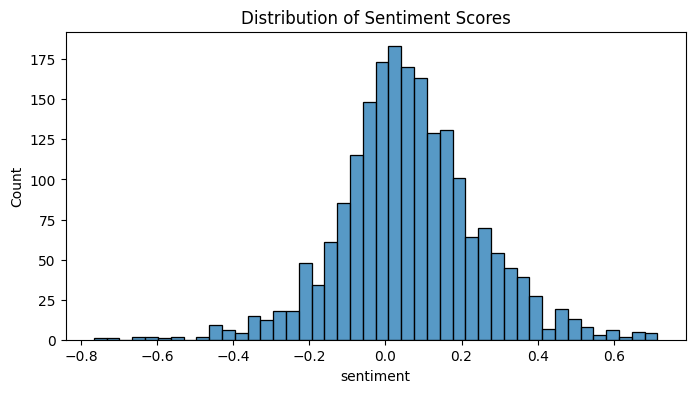

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment distribution visualization
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned_reviews['sentiment'])
plt.title('Distribution of Sentiment Scores')
plt.show()

By analyzing the sentiment of 2,000 airline reviews, the results show a slightly positively skewed distribution characterized by an average sentiment score of 0.062. The data show that most passengers' evaluations are concentrated between neutral and mildly positive, with relatively few extreme negative (<-0.6) and extreme positive (>0.6) evaluations. Overall, about 75% of the reviews had a sentiment score of 0.168 or higher, suggesting that overall passenger ratings of air service tend to be mildly positive. Although there are some negative reviews, the distribution chart shows that the proportion of strongly negative sentiment is small, which indicates that the majority of passengers' airline experience basically meets or exceeds expectations. Combined with the previous theme analysis, this sentiment distribution may reflect the fact that air service maintains a relatively stable service level in a number of areas, including seat comfort, crew service, and boarding process

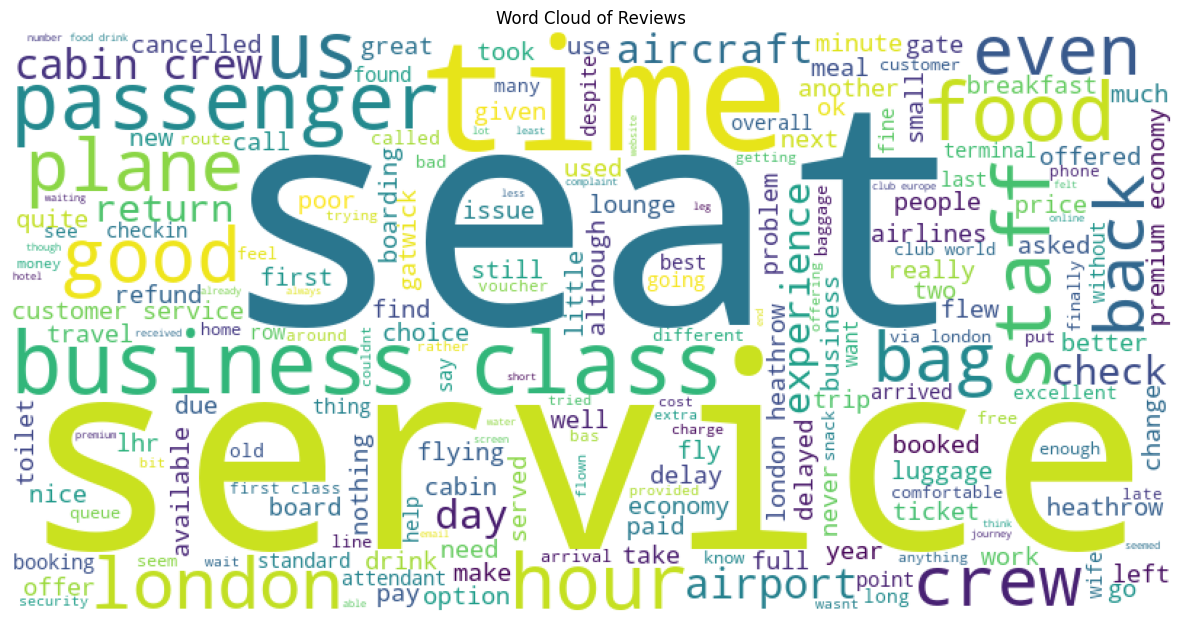

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned_reviews['processed_text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

**Core words (in order of display size):**<br>
seat/service - the most prominent word, indicating that seating and service are central concerns of the review<br>
passenger/business/class - referring to the passenger experience and class of cabin.<br>
time/hour - time-related topics are more prevalent<br>
crew/plane/London - crew, plane and London routes were frequently discussed

**The main topics are categorized:**<br>
Class service: business class, economy, seat, cabin<br>
Location related: London, Heathrow, airport, terminal<br>
Baggage services: bag, luggage, check<br>
Time management: time, hour, delay, boarding<br>
Service experience: crew, service, food, lounge

This word cloud validates the results of our previous thematic analysis, showing that reviews are mainly focused on seating experience, service quality, flight time and baggage service. The size distribution of the word cloud also reflects that passengers are most concerned about seating and service quality, followed by business class experience and time-related issues.